In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [95]:
data = pd.read_csv(r"C:\Users\satish prasad\Desktop\CAPSTONE PROJECT\ML PROJECT\survey lung cancer.csv")

In [96]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [98]:
data.isnull().values.any()

False

In [99]:
data.replace(" ", inplace = True)

In [100]:
data["LUNG_CANCER"].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

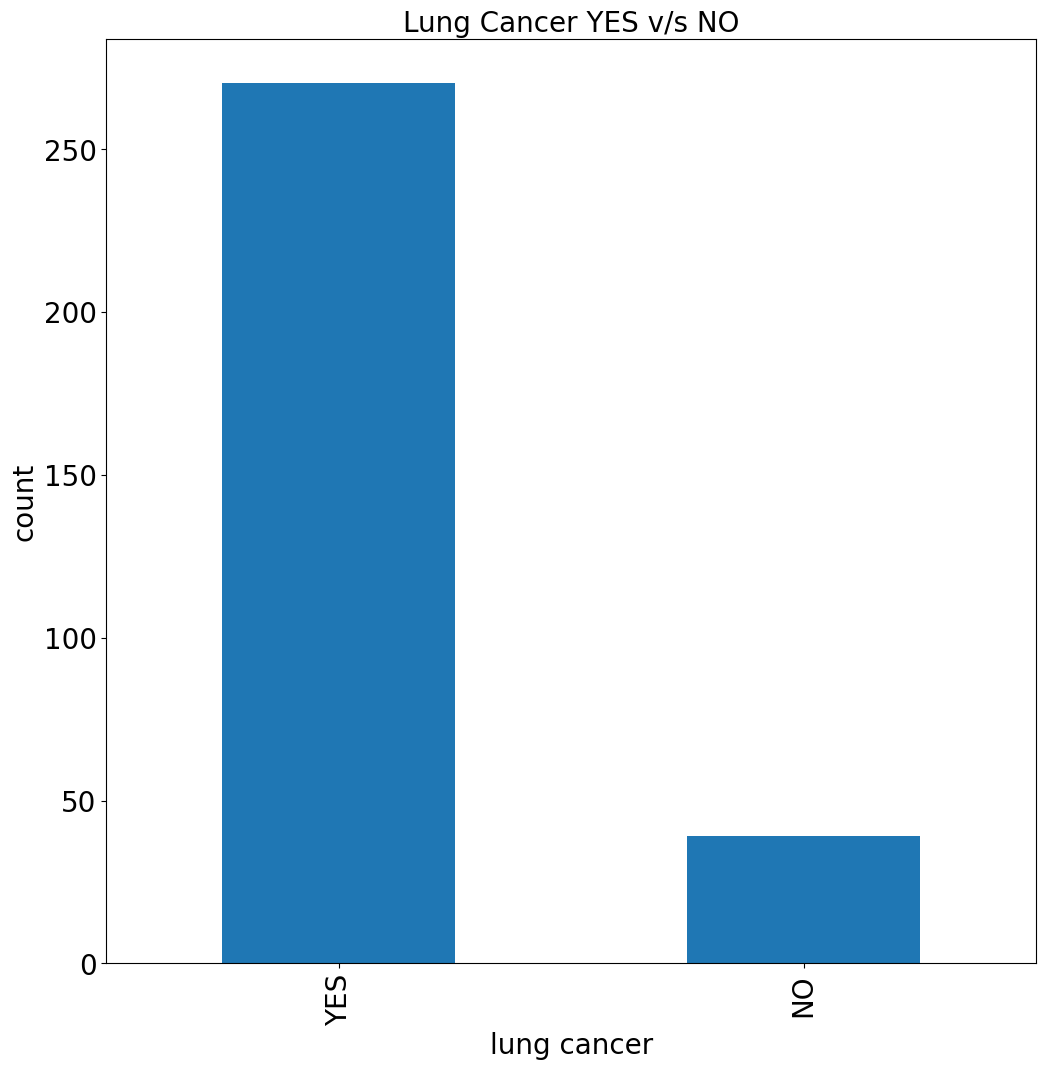

In [101]:
plt.figure(figsize = (12,12))
plt.title("Lung Cancer YES v/s NO",fontsize=20)
plt.xlabel("lung cancer", fontsize=20)
plt.ylabel("count",fontsize=20)
data["LUNG_CANCER"].value_counts().plot(kind= 'bar',fontsize=20)
plt.show()

In [102]:
data['GENDER'] = data['GENDER'].replace({'M': 1, 'F': 0})

In [103]:
data['LUNG_CANCER'] = data['LUNG_CANCER'].apply(lambda score: 1 if score=='YES' else 0)

In [104]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [105]:
x = data.iloc[:, [0,1,2, 3,4,5,6,7,8,9,10,11,12,13,14]].values
y = data["LUNG_CANCER"].values

In [106]:
x

array([[ 1, 69,  1, ...,  2,  2,  2],
       [ 1, 74,  2, ...,  2,  2,  2],
       [ 0, 59,  1, ...,  2,  1,  2],
       ...,
       [ 1, 58,  2, ...,  1,  1,  2],
       [ 1, 67,  2, ...,  2,  1,  2],
       [ 1, 62,  1, ...,  1,  2,  1]], dtype=int64)

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.2 , random_state=10)

In [108]:
x_train.shape

(247, 15)

In [109]:
x_test.shape

(62, 15)

In [110]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [111]:
model.predict(x_train)

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1], dtype=int64)

In [112]:
print("accuracy = " ,accuracy_score(y_test, model.predict(x_test)))

accuracy =  0.8870967741935484


In [113]:
model_predict = model.predict(x_test)

print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, model_predict)))
print(metrics.confusion_matrix(y_test, model_predict, labels=[1,0]))

print('Classification Report:')
print(metrics.classification_report(y_test, model_predict, labels=[1,0]))

Accuracy: 0.8871
[[52  5]
 [ 2  3]]
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.91      0.94        57
           0       0.38      0.60      0.46         5

    accuracy                           0.89        62
   macro avg       0.67      0.76      0.70        62
weighted avg       0.92      0.89      0.90        62



In [114]:
GENDER=1
AGE=69
SMOKING =1
YELLOW_FINGERS = 2
ANXIETY = 2
PEER_PRESSURE = 1
CHRONIC_DISEASE = 1
FATIGUE =2
ALLERGY= 1
WHEEZING = 2
ALCOHOL_CONSUMING = 2
COUGHING = 2
SHORTNESS_OF_BREATH = 2
SWALLOWING_DIFFICULTY = 2
CHEST_PAIN =2

model_predik = [[GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE ,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN]]

model_pred =model.predict(model_predik)

if model_pred == 1:
    result = "HAVE CHARACTERISTICS OF LUNG CANCER"
elif model_pred == 0 :
    result = "DOES NOT HAVE CHARACTERISTICS OF LUNG CANCER"
else :
    result = "eror"


print("based on prediction results with a high degree of accuracy : {0:.4f} ".format(metrics.accuracy_score(y_test, model_predict)),
      "\nthen it can be said :" ,result)

based on prediction results with a high degree of accuracy : 0.8871  
then it can be said : HAVE CHARACTERISTICS OF LUNG CANCER
